In [33]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [71]:
target_values = [1, 0, 1, 1, 1, 0.8, 0.95]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row[:-1])
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)

# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
file_folder_orgin = "D:/ASE2020-ExperimentData/GA/TurnRight_2021_01_07_NSGA_III_results_20000"
# file_folder_orgin = "D:/ASE2020-ExperimentData/GA/Overtake_2021_01_07_NSGA_III_results_20000"
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_26_Random_results_20000"
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    result = np.loadtxt(textname)
    violation_pattern = np.zeros((7), dtype = int)
    result_list.append(result)
    for j in range(len(violation_pattern)):
        if result[j] < target_values[j]:
            violation_pattern[j] = 1
        else:
            violation_pattern[j] = 0
            
    flag = 0
    for j in range (priority_list.shape[0]):
        if (np.array(violation_pattern) == priority_list[j]).all():
            flag = 1
            count_violations[j] += 1
            break
    if flag == 0:
        print(violation_pattern)
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])



[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   34    0   31    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1397    0    0
    0  165    0    3    0  228    0   84    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    3    0    0    0    4    0    8    0  352    0  532    0    0
    0    0    0    5    0    0   21    0    0  157    0    0 1819    0
   28    0    0  289    0 1859  183    0    0 7614    0  261    0 1051
    0 3872] 20000 20000


In [72]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.10986338582677163
24 0.1875


In [73]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,7.154297,0.983593,1.0,1.0,0.688938,0.966741
1,1.0,14.322077,1.000000,1.0,1.0,0.979674,0.996305
2,1.0,9.010567,1.000000,1.0,1.0,0.975940,0.993625
3,1.0,24.917929,1.000000,1.0,1.0,0.968166,0.995055
4,1.0,7.359569,0.805477,1.0,1.0,0.917327,0.976860
...,...,...,...,...,...,...,...
19995,1.0,6.946855,1.000000,1.0,1.0,0.894733,0.990547
19996,1.0,-1.000000,1.000000,1.0,1.0,0.780690,0.987364
19997,1.0,6.999946,0.707819,1.0,1.0,0.871041,0.966037
19998,1.0,6.769538,0.594260,1.0,1.0,0.915497,0.972240


D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


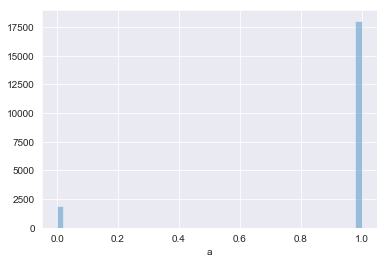

In [74]:
sns.distplot(data_result['a'],kde = False)

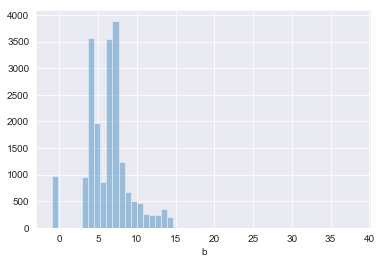

In [75]:
sns.distplot(data_result['b'],kde = False)

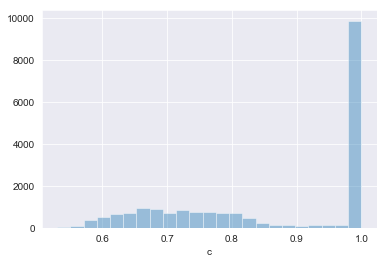

In [76]:
sns.distplot(data_result['c'],kde = False)

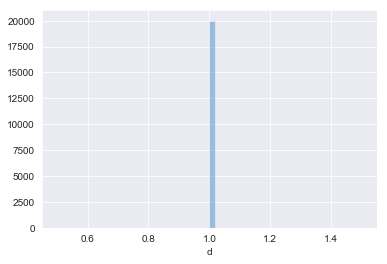

In [77]:
sns.distplot(data_result['d'],kde = False)

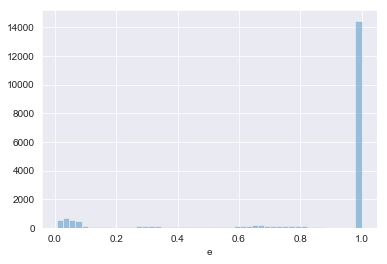

In [78]:
sns.distplot(data_result['e'],kde = False)

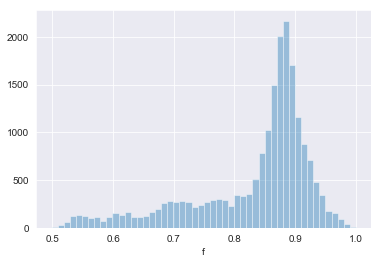

In [79]:
sns.distplot(data_result['f'],kde = False)

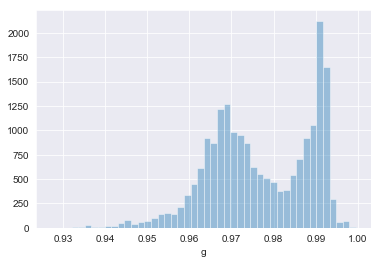

In [80]:
sns.distplot(data_result['g'],kde = False)

          a         b         c   d         e         f         g
a  1.000000  0.191976 -0.240626 NaN  0.242012  0.522915 -0.330088
b  0.191976  1.000000 -0.476528 NaN -0.213441  0.358788 -0.427884
c -0.240626 -0.476528  1.000000 NaN -0.051040 -0.463075  0.798043
d       NaN       NaN       NaN NaN       NaN       NaN       NaN
e  0.242012 -0.213441 -0.051040 NaN  1.000000  0.318098 -0.024503
f  0.522915  0.358788 -0.463075 NaN  0.318098  1.000000 -0.405765
g -0.330088 -0.427884  0.798043 NaN -0.024503 -0.405765  1.000000


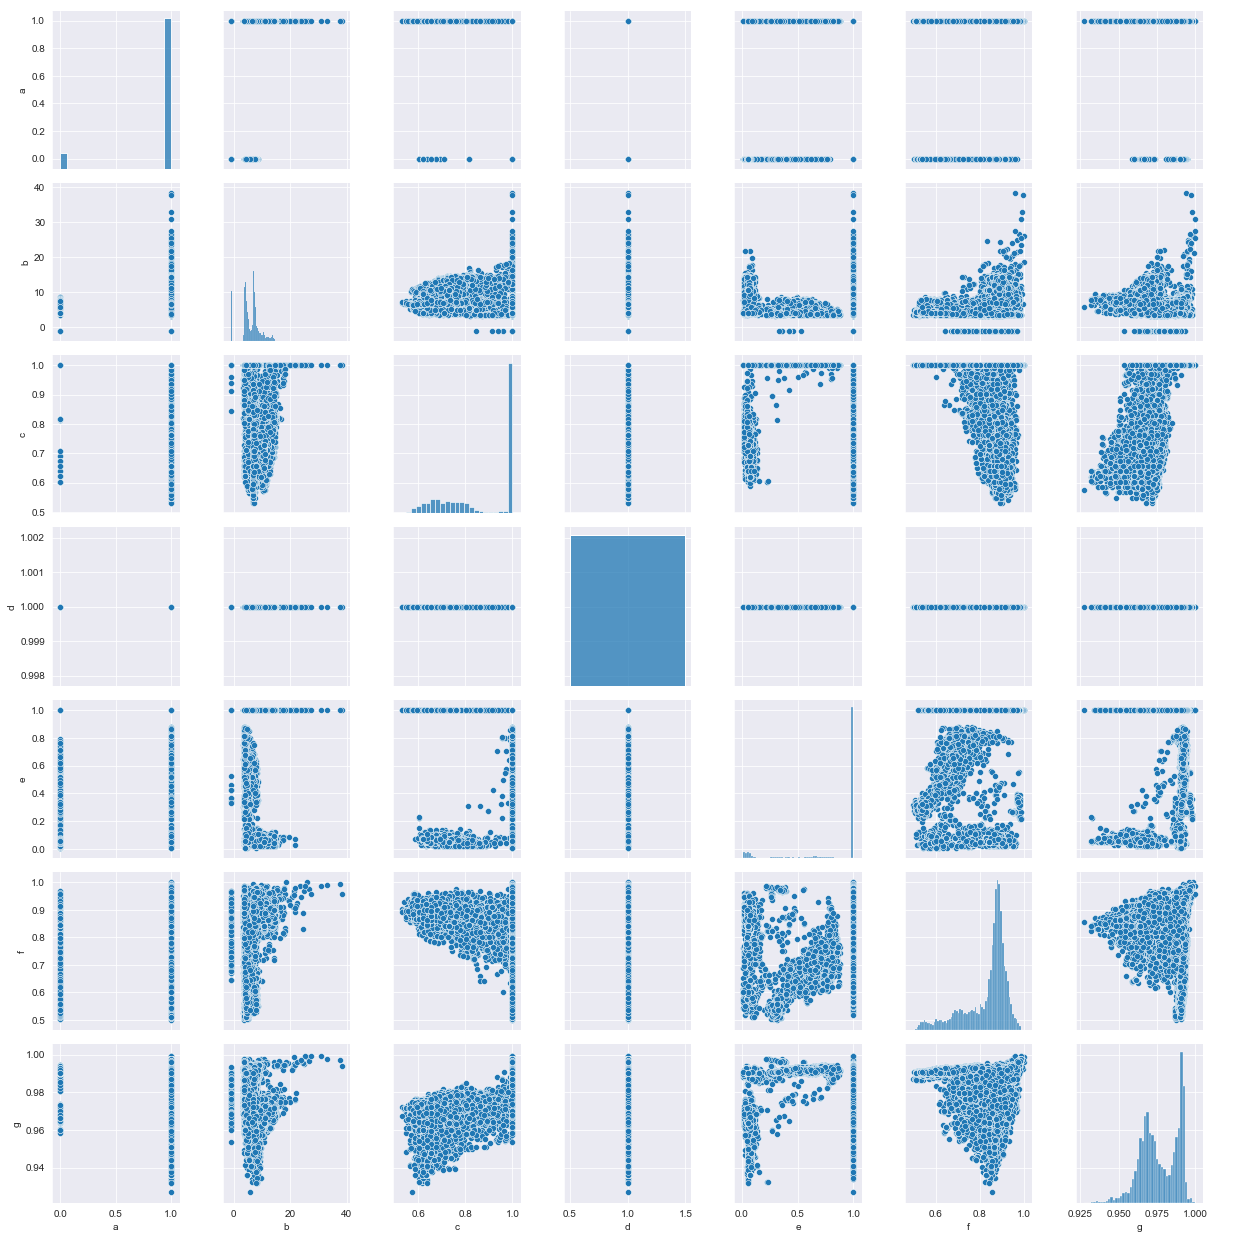

In [81]:
print(data_result.corr())
sns.pairplot(data_result)

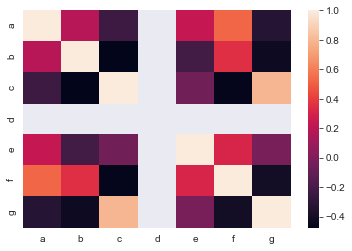

In [58]:
sns.heatmap(data_result.corr())

ValueError: The condensed distance matrix must contain only finite values.

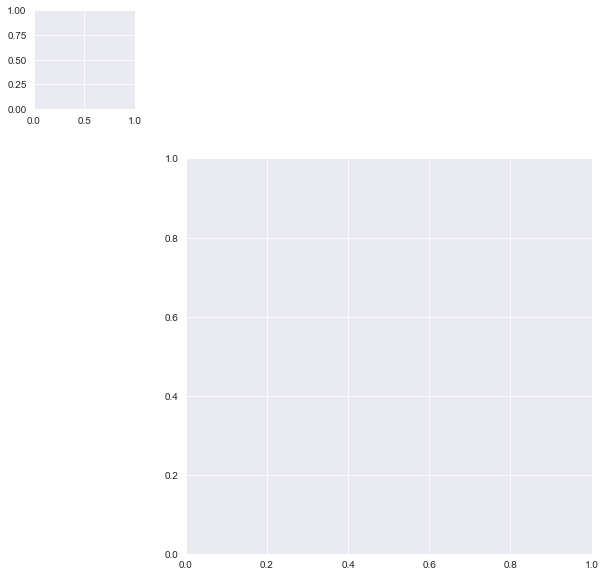

In [59]:
sns.clustermap(data_result.corr())

In [ ]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)